In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df=pd.read_csv("spam.csv")


In [82]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [83]:
df.shape

(5572, 5)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [85]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [86]:
df.sample(5)

,v1,v2
2930,ham,Hi' Test on &lt;#&gt; rd ....
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...
5297,ham,My darling sister. How are you doing. When's s...
5296,ham,Are u coming to the funeral home
1361,ham,Shuhui say change 2 suntec steamboat? U noe wh...


In [87]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [88]:
df.duplicated().sum()

403

In [89]:
df = df.drop_duplicates()

In [90]:
df.shape

(5169, 2)

In [91]:
df.rename(columns={"v1":"Target","v2":"Mssg"},inplace=True)

In [92]:
df.head()

,Target,Mssg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
encoder=LabelEncoder()

In [95]:
df["Target"] = encoder.fit_transform(df["Target"])

In [96]:
df.head()

,Target,Mssg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


C:\Users\Mayuresh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

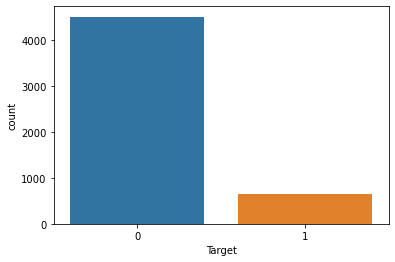

In [102]:
sns.countplot(df["Target"])

In [103]:
#!pip install nltk

In [104]:
import nltk

In [107]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mayuresh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [109]:
df["num_char"] = df["Mssg"].apply(len)

In [110]:
df.sample(5)

,Target,Mssg,num_char
2672,0,Super msg da:)nalla timing.,27
4374,1,Ur TONEXS subscription has been renewed and yo...,145
717,0,Book which lesson? then you msg me... I will c...,121
1135,0,K do I need a login or anything,31
3354,0,Minimum walk is 3miles a day.,29


In [113]:
df["num_words"] = df["Mssg"].apply(lambda x:len(nltk.word_tokenize(x)))

In [114]:
df.head()

,Target,Mssg,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [115]:
df["num_sent"] = df["Mssg"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [116]:
df.head()

,Target,Mssg,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [117]:
df.describe()

,Target,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.923776,18.456375,1.962275
std,0.332253,58.174846,13.323322,1.433892
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


<AxesSubplot:>

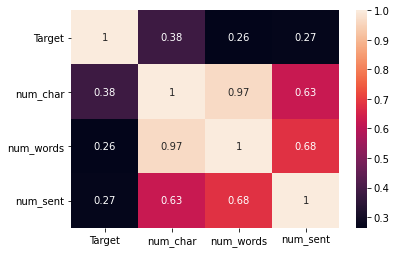

In [120]:
sns.heatmap(df.corr(),annot=True)

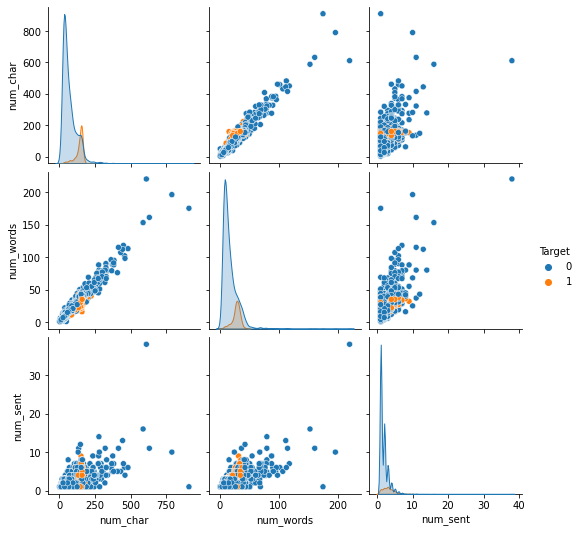

In [118]:
sns.pairplot(df,hue="Target")

In [123]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mayuresh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [125]:
from nltk.corpus import stopwords
#stopwords.words("english")

In [126]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [129]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [135]:
def transform_mssg(mssg):
    mssg = mssg.lower()
    mssg = nltk.word_tokenize(mssg)
    
    z=[]
    for i in mssg:
        if i.isalnum():
            z.append(i)
            
            
    mssg = z[:]
    z.clear()
    for i in mssg:
        if i not in stopwords.words("english") and i not in string.punctuation:
            z.append(i)
            
    mssg = z[:]
    z.clear()
    
    for i in mssg:
        z.append(ps.stem(i))
            
    return " ".join(z)

In [136]:
df["transformed_mssg"] = df["Mssg"].apply(transform_mssg)

In [137]:
df.sample(8)

,Target,Mssg,num_char,num_words,num_sent,transformed_mssg
2766,1,Married local women looking for discreet actio...,155,29,3,marri local women look discreet action 5 real ...
5331,0,X course it 2yrs. Just so her messages on mess...,72,16,2,x cours 2yr messag messeng lik r send
1518,0,Shall i ask one thing if you dont mistake me.,45,11,1,shall ask one thing dont mistak
1381,0,We spend our days waiting for the ideal path t...,155,37,2,spend day wait ideal path appear front us forg...
3232,0,Height of recycling: Read twice- People spend ...,149,33,2,height recycl read peopl spend time earn money...
1135,0,K do I need a login or anything,31,8,1,k need login anyth
238,0,"New Theory: Argument wins d SITUATION, but los...",145,37,6,new theori argument win situat lose person don...
1829,1,Hottest pics straight to your phone!! See me g...,151,32,3,hottest pic straight phone see get wet want xx...


In [142]:
#!pip install wordcloud

In [143]:
from wordcloud import WordCloud

In [157]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="black")

In [158]:
not_spam = wc.generate(df[df["Target"]==0]["transformed_mssg"].str.cat(sep=" "))

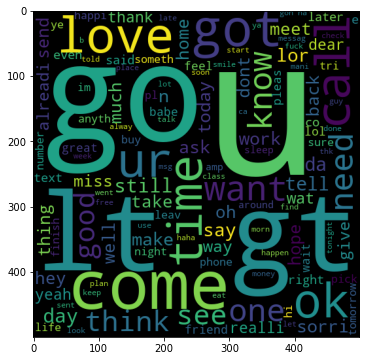

In [166]:
plt.figure(figsize=(16,6))
plt.imshow(not_spam)
#plt.figure(figsize=(15,8))

In [167]:
is_spam = wc.generate(df[df["Target"]==1]["transformed_mssg"].str.cat(sep=" "))

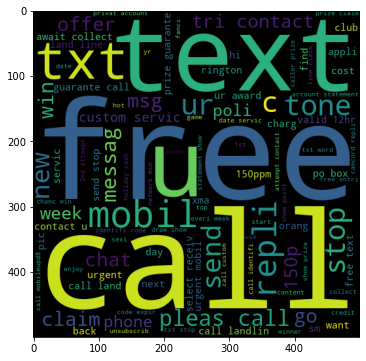

In [168]:
plt.figure(figsize=(16,6))
plt.imshow(is_spam)

In [169]:
df

,Target,Mssg,num_char,num_words,num_sent,transformed_mssg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will �_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [193]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [239]:
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=2000)

In [240]:
#x = cv.fit_transform(df["transformed_mssg"]).toarray()
x = tfidf.fit_transform(df["transformed_mssg"]).toarray()

In [241]:
x.shape

(5169, 2000)

In [242]:
y = df["Target"].values

In [243]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [245]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [246]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()


In [247]:
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8423597678916828
0.4497991967871486
[[759 137]
 [ 26 112]]


In [248]:
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9854932301740812
0.992
[[895   1]
 [ 14 124]]


In [249]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.97678916827853
1.0
[[896   0]
 [ 24 114]]


In [250]:
import pickle

In [251]:
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))